In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('seaborn')

In [2]:
temperatures = (
#     0.39919, 0.79968, 1.19905, 1.60290, 1.99690,
    2.80000, 2.40358, 1.98873, 1.60454, 1.20112,
)

In [3]:
rdf_data = pd.DataFrame(columns=['radius'])

for temperature in temperatures:
    df = pd.read_csv(
        f'rdf_file_T_{temperature:.5f}.csv',
        sep=';',
    )
    rdf_data = rdf_data.merge(
        right=df,
        how='outer',
        on='radius',
    )
    rdf_data = rdf_data.rename(columns={'rdf': f'{temperature:.5f}'})
    
rdf_data

,radius,2.80000,2.40358,1.98873,1.60454,1.20112
0,0.005,5.855646e+08,5.855646e+08,5.855646e+08,5.855646e+08,5.855646e+08
1,0.015,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.025,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.035,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.045,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...
608,6.085,1.002782e+00,9.848006e-01,9.358329e-01,8.728604e-01,8.258403e-01
609,6.095,1.002209e+00,9.840519e-01,9.344063e-01,8.727619e-01,8.263375e-01
610,6.105,1.001199e+00,9.842232e-01,9.351851e-01,8.718601e-01,8.249658e-01
611,6.115,9.997310e-01,9.847156e-01,9.344208e-01,8.708497e-01,8.252529e-01


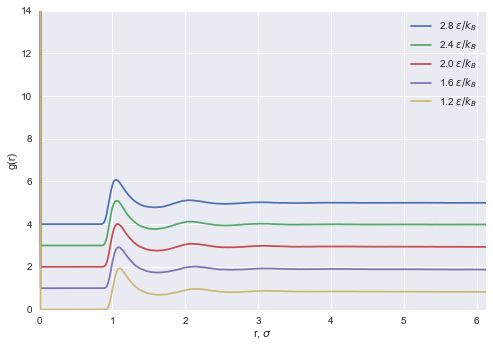

In [4]:
for i, temperature in enumerate(temperatures):
    plt.plot(
        rdf_data['radius'], 
        rdf_data[f'{temperature:.5f}'] + len(temperatures) - i - 1, 
        label=f'{temperature:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel('r, $\sigma$');
plt.ylabel('g(r)');
plt.xlim(left=0, right=6.125);
plt.ylim(bottom=0, top=14);
plt.legend();